# Model Evaluation

**Goal:** Evaluate trained model on test data, generate error plots, and validate business criteria.


In [10]:
# ===========================
# Imports
# ===========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Load Data & Model

In [11]:
# Load test data
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

# Load trained model
model = joblib.load('../models/best_model.pkl')


## Evaluation Metrics

In [12]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate model performance with MAE, RMSE, and R².
    """
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}")
    
    return y_pred, mae, rmse, r2

y_pred, mae, rmse, r2 = evaluate_model(model, X_test, y_test)


MAE: 259.6582
RMSE: 90643.6796
R2: 0.9881


## Predicted vs Actual Plot

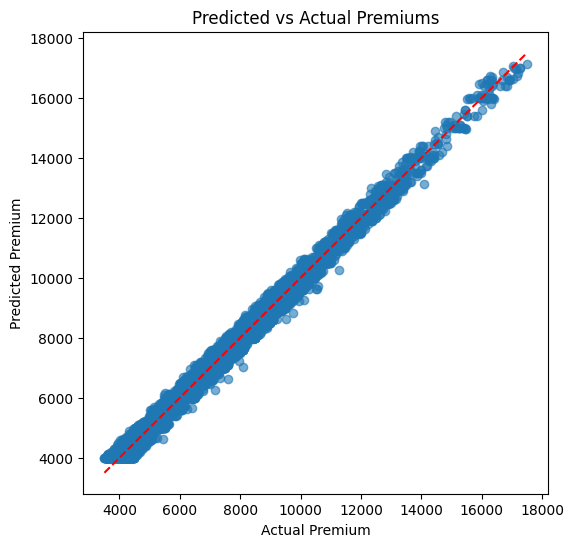

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Predicted vs Actual Premiums')
plt.show()


## Error Distribution

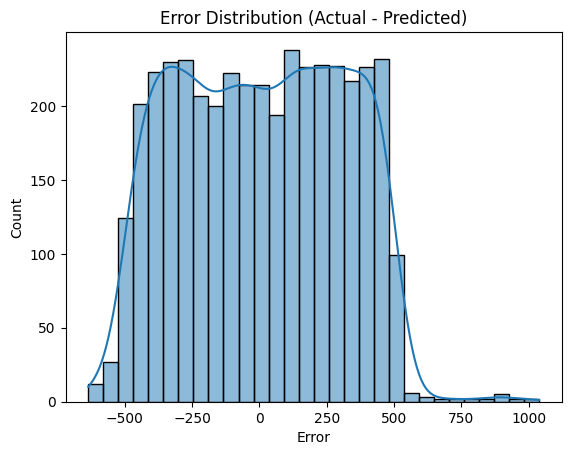

In [14]:
errors = y_test.values.flatten() - y_pred
sns.histplot(errors, kde=True, bins=30)
plt.title('Error Distribution (Actual - Predicted)')
plt.xlabel('Error')
plt.show()


## Business Criteria Check
- Accuracy ≥ 97%
- At least 95% of predictions have <10% error

In [15]:
# Calculate percentage error
pct_errors = np.abs((y_test.values.flatten() - y_pred) / y_test.values.flatten()) * 100

# Business rule check
within_10pct = np.mean(pct_errors < 10) * 100
print(f'✅ Predictions within 10% error: {within_10pct:.2f}%')


✅ Predictions within 10% error: 97.69%


## Summary
✅ Evaluation metrics computed  
✅ Predicted vs actual plotted  
✅ Error distribution checked  
✅ Business criteria validated  
